# Proyek Analisis Data: [E-Commerce Public]
- **Nama:** [Aryanti Raihana Thamrin]
- **Email:** [aryantiraihana@gmail.com]
- **ID Dicoding:** [hanaaryanti]

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang memiliki rating review paling baik dan buruk?
- Apakah ada pola keterlambatan pengiriman berdasarkan kategori keterlambatan?

## Import Semua Packages/Library yang Digunakan

In [407]:
!pip freeze requirements.txt

altair==5.5.0
anyio==4.8.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==3.0.0
async-lru==2.0.4
attrs==25.1.0
babel==2.17.0
beautifulsoup4==4.13.3
bleach==6.2.0
blinker==1.9.0
cachetools==5.5.2
certifi==2025.1.31
cffi==1.17.1
charset-normalizer==3.4.1
click==8.1.8
colorama==0.4.6
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.12
decorator==5.2.1
defusedxml==0.7.1
executing==2.2.0
fastjsonschema==2.21.1
fonttools==4.56.0
fqdn==1.5.1
gitdb==4.0.12
GitPython==3.1.44
h11==0.14.0
httpcore==1.0.7
httpx==0.28.1
idna==3.10
ipykernel==6.29.5
ipython==8.32.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.5
json5==0.10.0
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter==1.1.1
jupyter-console==6.6.3
jupyter-events==0.12.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server==2.15.0
jupyter_server_terminals==0.5.3
jupyterlab==4.3.5
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
jupyt

In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st

## Data Wrangling

### Gathering Data

In [409]:
reviews_df = pd.read_csv("data/order_reviews_dataset.csv", delimiter=",")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [410]:
orders_df = pd.read_csv("data/orders_dataset.csv", delimiter=",")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [411]:
items_df = pd.read_csv("data/order_items_dataset.csv", delimiter=",")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [412]:
products_df = pd.read_csv("data/products_dataset.csv", delimiter=",")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [413]:
product_translation_df = pd.read_csv("data/product_category_name_translation.csv", delimiter=",")
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- dataset order_reviews memiliki kolom review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp
- dataset orders memiliki kolom order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
- dataset items memiliki kolom order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value
- dataset products memiliki kolom product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm
- dataset product_translation_df memiliki kolom product_category_name dan product_category_name_english

### Assessing Data

In [414]:
orders_df = orders_df[orders_df["order_status"] == "delivered"]

orders_reviews_df = pd.merge(
    left=orders_df,
    right=reviews_df,
    how="inner",
    on="order_id"
)

orders_reviews_items_df = pd.merge(
    left=orders_reviews_df,
    right=items_df,
    how="left",
    on="order_id"
)

orders_reviews_items_products_df = pd.merge(
    left=orders_reviews_items_df,
    right=products_df,
    how="left",
    on="product_id"
)

final_df = pd.merge(
    left=orders_reviews_items_products_df,
    right=product_translation_df,
    how="left",
    on="product_category_name",
)

In [415]:
final_df_case1 = final_df[["order_id","product_category_name_english","review_score"]]

final_df_case1.head()

,order_id,product_category_name_english,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,housewares,4
1,53cdb2fc8bc7dce0b6741e2150273451,perfumery,4
2,47770eb9100c2d0c44946d9cf07ec65d,auto,5
3,949d5b44dbf5de918fe9c16f97b45f8a,pet_shop,5
4,ad21c59c0840e6cb83a9ceb5573f8159,stationery,5


In [416]:
final_df_case2 = final_df[["order_id","product_category_name_english", "order_delivered_customer_date", "order_estimated_delivery_date"]]

final_df_case2.head()

,order_id,product_category_name_english,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,housewares,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,perfumery,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,auto,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,pet_shop,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,stationery,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Dari banyaknya kolom hasil merge antara 5 dataset, final_df_case1 diproses sehingga menjadi memiliki 3 kolom yaitu order_id, product_category_name_english dan review_score
- Dari banyaknya kolom hasil merge antara 5 dataset, saat ini final_df_case2 memiliki 4 kolom yaitu order_id, product_category_name_english, order_delivered_customer_date, order_estimated_delivery_date

### Cleaning Data

**Pertanyaan 1**

In [417]:
print("Jumlah data: ", len(final_df_case1))

Jumlah data:  110013


In [418]:
final_df_case1.isna().sum()

order_id                            0
product_category_name_english    1555
review_score                        0
dtype: int64

In [419]:
final_df_case1 = final_df_case1.dropna()

In [420]:
# cek apakah masih ada missing value
final_df_case1.isna().sum()

order_id                         0
product_category_name_english    0
review_score                     0
dtype: int64

In [421]:
print("Jumlah duplikasi: ", final_df_case1.duplicated().sum())

Jumlah duplikasi:  13042


In [422]:
final_df_case1 = final_df_case1.drop_duplicates(subset=["order_id"])

In [423]:
print("Jumlah data: ", len(final_df_case1))

Jumlah data:  94489


**Insight:**
- Awalnya final_df_case1 memiliki 110013 data yang di dalamnya terdapat missing value sebanyak 1555 pada kolom product_category_name_english dan terdapat 13042 data duplikat, kemudian setelah dilakukan cleaning maka data akhir berjumlah 94489.

**Pertanyaan 2**

In [424]:
print("Jumlah data: ", len(final_df_case2))

Jumlah data:  110013


In [425]:
final_df_case2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110013 entries, 0 to 110012
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       110013 non-null  object
 1   product_category_name_english  108458 non-null  object
 2   order_delivered_customer_date  110005 non-null  object
 3   order_estimated_delivery_date  110013 non-null  object
dtypes: object(4)
memory usage: 3.4+ MB


In [426]:
datetime_columns = ["order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  final_df_case2[column] = pd.to_datetime(final_df_case2[column])

C:\Users\Hana\AppData\Local\Temp\ipykernel_18888\7924334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_case2[column] = pd.to_datetime(final_df_case2[column])
C:\Users\Hana\AppData\Local\Temp\ipykernel_18888\7924334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_case2[column] = pd.to_datetime(final_df_case2[column])


In [427]:
# cek apakah tipe datanya sudah berubah
final_df_case2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110013 entries, 0 to 110012
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110013 non-null  object        
 1   product_category_name_english  108458 non-null  object        
 2   order_delivered_customer_date  110005 non-null  datetime64[ns]
 3   order_estimated_delivery_date  110013 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 3.4+ MB


In [428]:
final_df_case2.isna().sum()

order_id                            0
product_category_name_english    1555
order_delivered_customer_date       8
order_estimated_delivery_date       0
dtype: int64

In [429]:
final_df_case2 = final_df_case2.dropna()

In [430]:
final_df_case2.isna().sum()

order_id                         0
product_category_name_english    0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [431]:
print("Jumlah duplikasi: ", final_df_case2.duplicated().sum())

Jumlah duplikasi:  13236


In [432]:
# menghapus duplikasi, namun menyisakan satu baris untuk setiap order_id
final_df_case2 = final_df_case2.drop_duplicates(subset=["order_id"])

In [433]:
# cek apakah masih ada data yang duplikat
print("Jumlah duplikasi: ", final_df_case2.duplicated().sum())

Jumlah duplikasi:  0


In [434]:
print("Jumlah data: ", len(final_df_case2))

Jumlah data:  94481


**Insight:**
- Awalnya final_df_case2 memiliki 110013 data yang di dalamnya terdapat 1555 missing value pada kolom product_category_name_english dan 8 missing value pada kolom order_delivered_customer_date serta terdapat 13236 data duplikat. Kemudian setelah dilakukan cleaning maka data akhir berjumlah 94481.
- kolom order_delivered_customer_date dan order_estimated_delivery_date memiliki tipe data object yang kemudian diubah menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [435]:
print(final_df_case1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94489 entries, 0 to 110012
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       94489 non-null  object
 1   product_category_name_english  94489 non-null  object
 2   review_score                   94489 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB
None


In [436]:
print(final_df_case1.describe())

       review_score
count  94489.000000
mean       4.157786
std        1.282979
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


In [437]:
# menghitung berapa kali setiap kategori produk muncul dalam dataset
category_counts = final_df_case1["product_category_name_english"].value_counts()
print(category_counts)

product_category_name_english
bed_bath_table               9076
health_beauty                8562
sports_leisure               7449
computers_accessories        6471
furniture_decor              6167
                             ... 
home_comfort_2                 21
cds_dvds_musicals              12
la_cuisine                     11
fashion_childrens_clothes       7
security_and_services           2
Name: count, Length: 71, dtype: int64


In [438]:
# menghitung rata-rata skor review per kategori
category_ratings = final_df_case1.groupby("product_category_name_english")["review_score"].mean()
print(category_ratings)

product_category_name_english
agro_industry_and_commerce    4.107345
air_conditioning              4.128631
art                           4.126984
arts_and_craftmanship         4.136364
audio                         3.844575
                                ...   
stationery                    4.305145
tablets_printing_image        4.173333
telephony                     4.056022
toys                          4.239467
watches_gifts                 4.127025
Name: review_score, Length: 71, dtype: float64


In [439]:
final_df_case1.to_csv("dashboard/final_df_case1.csv", index=False)

**Insight**
- final_df_case1 memiliki 94489 data dengan 3 kolom yaitu order_id, product_name_category_english dan review_score
- secara keseluruhan review score memiliki rata-rata (average) yaitu 4.083424
- kategori bed_bath_table menjadi kategori dengan paling banyak direview konsumen

In [440]:
print(final_df_case2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94481 entries, 0 to 110012
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94481 non-null  object        
 1   product_category_name_english  94481 non-null  object        
 2   order_delivered_customer_date  94481 non-null  datetime64[ns]
 3   order_estimated_delivery_date  94481 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 3.6+ MB
None


In [441]:
# menghitung selisih hari antara tanggal pesanan diterima pelanggan dengan tanggal estimasi pengiriman
final_df_case2["delivery_delay_days"] = (
    final_df_case2["order_delivered_customer_date"] - final_df_case2["order_estimated_delivery_date"]
).dt.days

bins = [-float("inf"), 0, 3, 7, float("inf")] 
labels = ["Tepat Waktu", "Terlambat 1-3 hari", "Terlambat 4-7 hari", "Terlambat >7 hari"]

final_df_case2["delivery_category"] = pd.cut(final_df_case2["delivery_delay_days"], bins=bins, labels=labels, right=False)

delay_counts = (final_df_case2.groupby(["product_category_name_english", "delivery_category"]).size().unstack().fillna(0))

top_10_categories = delay_counts.sum(axis=1).nlargest(10).index
delay_counts_top10 = delay_counts.loc[top_10_categories]


C:\Users\Hana\AppData\Local\Temp\ipykernel_18888\4230844241.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_counts = (final_df_case2.groupby(["product_category_name_english", "delivery_category"]).size().unstack().fillna(0))


In [442]:
# analisis waktu pengiriman per bulan
final_df_case2["order_month"] = final_df_case2["order_delivered_customer_date"].dt.month
monthly_delay = final_df_case2.groupby("order_month")["delivery_delay_days"].mean()
print(monthly_delay)

order_month
1    -12.821445
2    -14.612496
3     -9.612839
4     -9.583193
5    -11.736556
6    -15.797394
7    -13.275478
8    -10.045130
9     -9.967544
10   -13.895887
11   -10.928664
12   -11.326696
Name: delivery_delay_days, dtype: float64


In [443]:
print(final_df_case2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94481 entries, 0 to 110012
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94481 non-null  object        
 1   product_category_name_english  94481 non-null  object        
 2   order_delivered_customer_date  94481 non-null  datetime64[ns]
 3   order_estimated_delivery_date  94481 non-null  datetime64[ns]
 4   delivery_delay_days            94481 non-null  int64         
 5   delivery_category              94481 non-null  category      
 6   order_month                    94481 non-null  int32         
dtypes: category(1), datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 4.8+ MB
None


In [444]:
final_df_case2.to_csv("dashboard/final_df_case2.csv", index=False)

**Insight:**
- final_df_case2 memiliki 94481 data dengan 4 kolom yaitu order_id, product_name_category_english, order_delivered_customer_date, order_estimated_delivery_date dan 3 kolom tambahan yaitu delivery_delay_days, delivery_category dan order_month. 
- pengiriman paling cepat terjadi di bulan Juni dan paling lama (namun tetap tepat waktu) terjadi di bulan April

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang memiliki rating review paling baik dan buruk?

C:\Users\Hana\AppData\Local\Temp\ipykernel_18888\2001207401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=final_df_case1["review_score"],


Text(0.5, 1.0, 'Count of Review Scores')

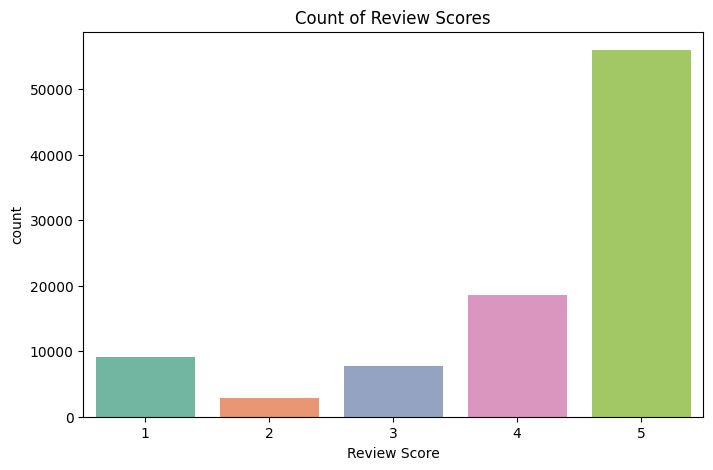

In [445]:
plt.figure(figsize=(8,5))
sns.countplot(x=final_df_case1["review_score"], 
              palette="Set2")
plt.xlabel("Review Score")
plt.title("Count of Review Scores")

**Insight:**
- Review score dengan nilai 5 merupakan yang tertinggi. Sehingga bisa ditarik kesimpulan bahwa mayoritas konsumen sudah merasa puas dengan produk yang mereka beli.

C:\Users\Hana\AppData\Local\Temp\ipykernel_18888\986557773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.head(10).values,


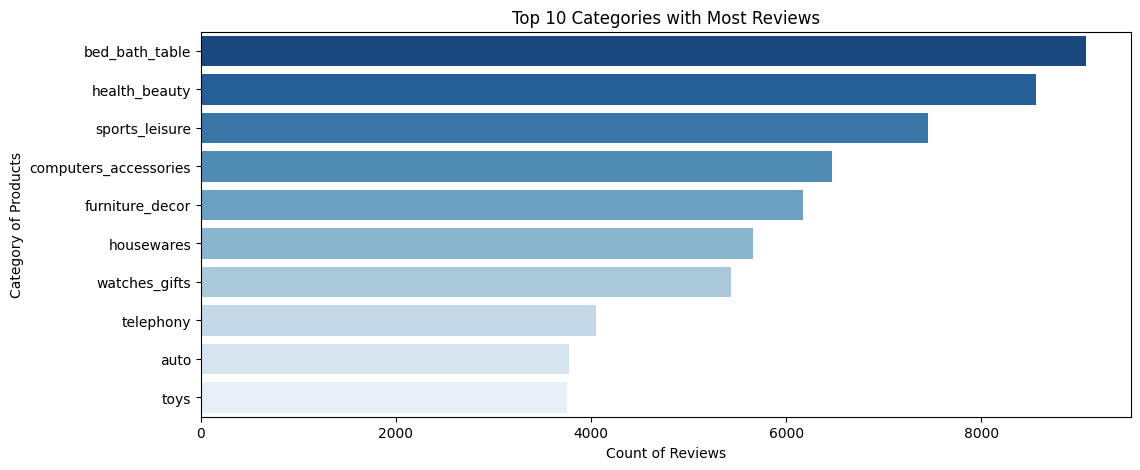

In [446]:
# analisis kategori produk yang sering diberi review
plt.figure(figsize=(12, 5))
sns.barplot(x=category_counts.head(10).values, 
            y=category_counts.head(10).index, 
            palette="Blues_r")
plt.xlabel("Count of Reviews")
plt.ylabel("Category of Products")
plt.title("Top 10 Categories with Most Reviews")
plt.show()

**Insight:**
- Kategori bed_bath_table merupakan kategori yang sering diberikan review oleh konsumen. Dimungkinkan, produk-produk dalam kategori ini yang sering dibeli oleh konsumen.

C:\Users\Hana\AppData\Local\Temp\ipykernel_18888\177283783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.sort_values(ascending=False).head(10).values,


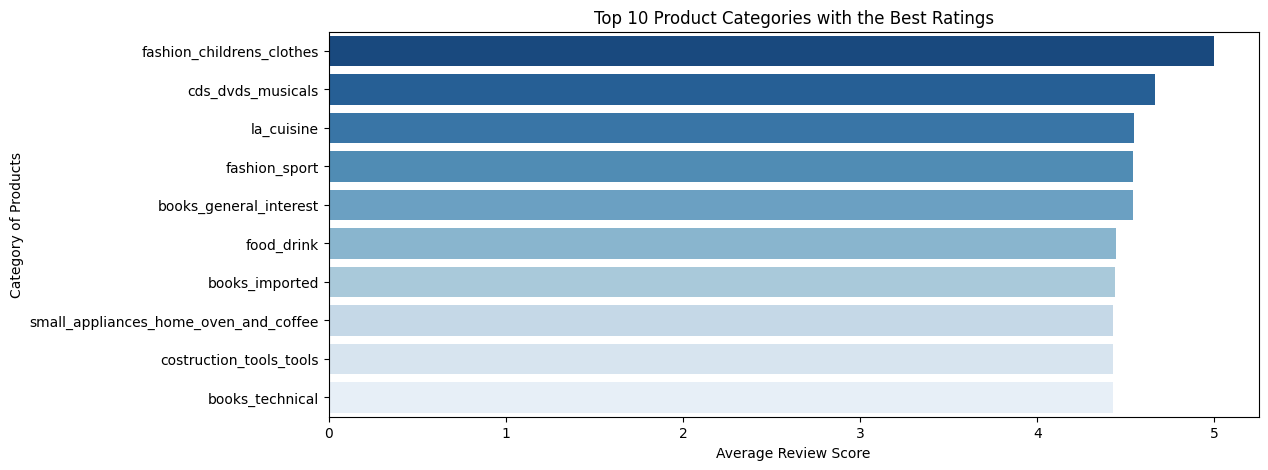

In [447]:
# analisis kategori produk yang memiliki review paling baik
plt.figure(figsize=(12,5))
sns.barplot(x=category_ratings.sort_values(ascending=False).head(10).values,
            y=category_ratings.sort_values(ascending=False).head(10).index,
            palette="Blues_r")
plt.xlabel("Average Review Score")
plt.ylabel("Category of Products")
plt.title("Top 10 Product Categories with the Best Ratings")
plt.show()

C:\Users\Hana\AppData\Local\Temp\ipykernel_18888\3872155347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.sort_values(ascending=True).head(10).values,


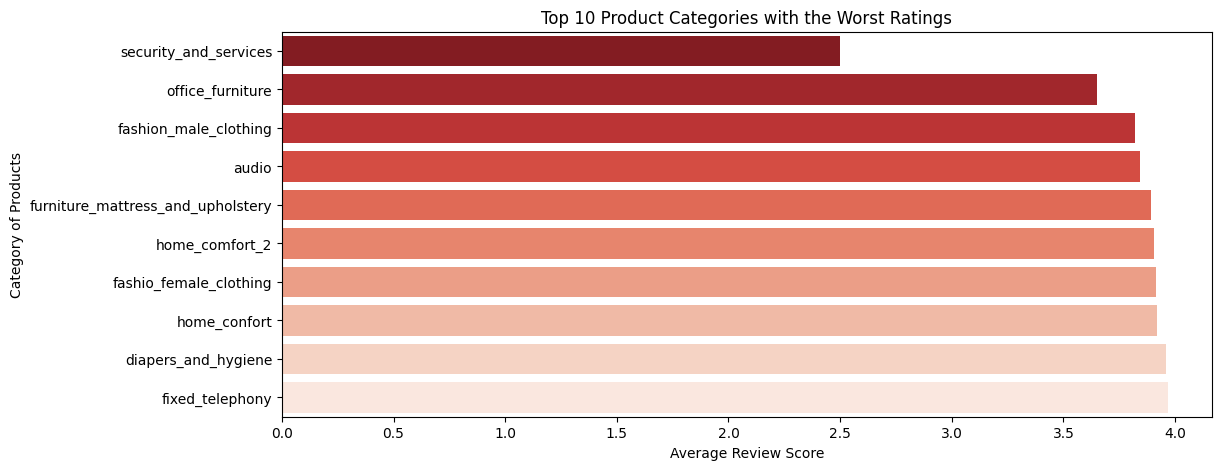

In [448]:
plt.figure(figsize=(12,5))
sns.barplot(x=category_ratings.sort_values(ascending=True).head(10).values,
            y=category_ratings.sort_values(ascending=True).head(10).index,
            palette="Reds_r")
plt.xlabel("Average Review Score")
plt.ylabel("Category of Products")
plt.title("Top 10 Product Categories with the Worst Ratings")
plt.show()

### Pertanyaan 2: Apakah ada pola keterlambatan pengiriman berdasarkan kategori keterlambatan?

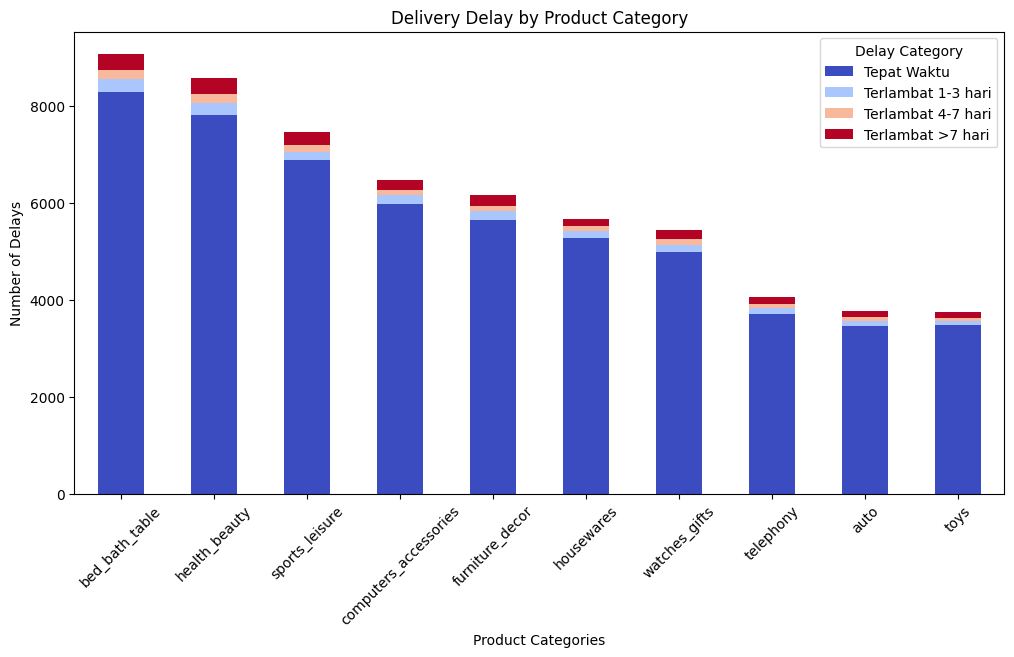

In [449]:
delay_counts_top10.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Product Categories")
plt.ylabel("Number of Delays")
plt.title("Delivery Delay by Product Category")
plt.legend(title="Delay Category")
plt.xticks(rotation=45)
plt.show()


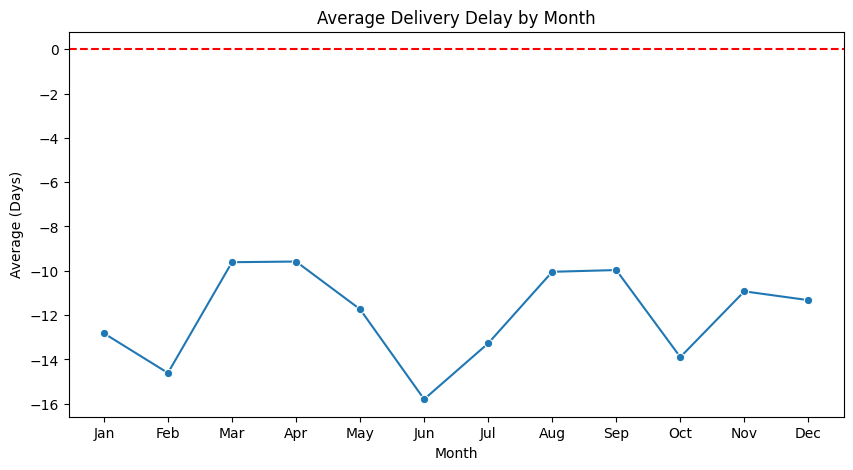

In [450]:
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_delay.index, y=monthly_delay.values, marker="o")
plt.axhline(0, color="red", linestyle="dashed")
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Average Delivery Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average (Days)")
plt.show()

**Insight:**
- Rata-rata pengiriman dari bulan Januari hingga Desember selalu lebih cepat dari estimasi.
- Waktu pengiriman bervariasi setiap bulannya

In [451]:
!streamlit run dashboard/app.py

^C


**Insight:**
- 10 kategori dengan rating terbaik secara berturut-turut yaitu fashion_childrens_clothes, cds_dvds_musicals, books_general_interest, books_imported, construction_tools_tools, small_appliances_home_oven_and_coffee, flowers, books_technical, food_drink, fashion_sport.
- 10 kategori dengan rating terburuk yaitu furniture_mattress_and_upholstery, home_confort, dan party_supplies, audio, fixed_telephony, home_comfort_2, office_furniture, diapers_and hygine, security_and_service.
- Mayoritas pengiriman di semua kategori berhasil dikirim tepat waktu

## Conclusion

- Kategori dengan rating terbaik yaitu fashion_childrens_clothes menunjukkan bahwa konsumen merasa puas dengan produk-produk dalam kategori tersebut. 
- Kategori dengan rating terburuk yaitu furniture_mattress_and_upholstery dimungkinkan karena adanya masalah pada kualitas produk, layanan atau hal lain yang berkaitan dengan kepuasan pelanggan.
- Sebagian besar pengiriman dalam semua kategori produk berhasil dilakukan tepat waktu. Ini ditunjukkan oleh bagian (warna) hijau yang dominan di setiap batang grafik. Kategori dengan frekuensi keterlambatan tertinggi adalah bed_bath_table, menunjukkan adanya masalah khusus dalam proses pengiriman untuk produk-produk dalam kategori ini.